In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../data/train.csv')

In [61]:
df.sample(5)

,ID,input_text,label_text,target,predefined_news_category,annotations,url,date
6954,ynat-v1_train_06035,美경제 감속…GDP 증가율 1분기 3.1%→2분기 2.1%종합,World,4,세계,"{'annotators': ['16', '07', '08'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.07.26. 오후 11:36
13778,ynat-v1_train_11992,카톡 메시지 송·수신 일시 지연…시스템 과부하종합,IT/Science,5,IT과학,"{'annotators': ['08', '12', '02'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.13. 오후 4:08
35314,ynat-v1_train_30728,4.27 남북정상회담 1주년 학술회의,Politics,0,사회,"{'annotators': ['08', '02', '07'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.24. 오후 2:52
25803,ynat-v1_train_22470,랜섬웨어 공포 ② 내 컴퓨터 어떻게 지키나…보안 기본원칙 충실해야,IT/Science,5,IT과학,"{'annotators': ['07', '16', '13'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2017.06.18. 오후 1:00
17752,ynat-v1_train_15455,伊 난민 구조 NGO에 벌금 부과 추진…1인당 최대 730만원,World,4,세계,"{'annotators': ['16', '07', '10'], 'annotation...",https://news.naver.com/main/read.nhn?mode=LS2D...,2019.05.14. 오전 11:59


In [36]:
# drop duplicates by input_text
df = df.drop_duplicates(subset=['input_text'])

In [41]:
df.label_text.unique()

array(['생활문화', '사회', 'IT과학', '스포츠', '세계', '정치', '경제'], dtype=object)

In [42]:
col_to_eng = {
    "생활문화" : "Culture",
    "정치" : "Politics",
    "경제" : "Economy",
    "IT과학" : "IT/Science",
    "사회" : "Society",
    "스포츠" : "Sports",
    "세계" : "World",
}

In [56]:
df.label_text = df.label_text.map(lambda x: col_to_eng[x])

<Axes: xlabel='label_text'>

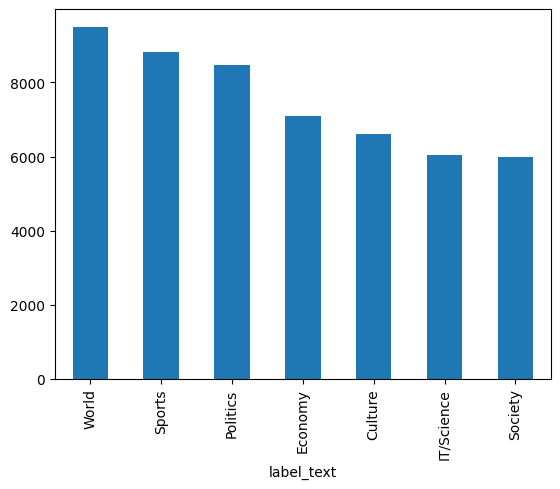

In [58]:
df.label_text.value_counts().plot(kind='bar')

In [64]:
# find unique anotator
df.annotations = df.annotations.map(lambda x: eval(x))

In [65]:
df.annotations[0]

{'annotators': ['08', '13', '07'],
 'annotations': {'first-scope': ['생활문화', '생활문화', 'IT과학'],
  'second-scope': ['IT과학', '해당없음', '해당없음'],
  'third-scope': ['해당없음', '해당없음', '해당없음']}}